<a href="https://colab.research.google.com/github/Israel-Garcilazo/EDP1/blob/main/GrafFourier1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduce el intervalo L: 2
Introduce el número de armónicos N: 30
Introduce la función a trozos (por ejemplo, 'x < -np.pi: 0, -np.pi <= x < 0: 1, 0 <= x < np.pi: -1'): '-2 <= x < 0: 0, 0 <= x <= 2: 2 - x '


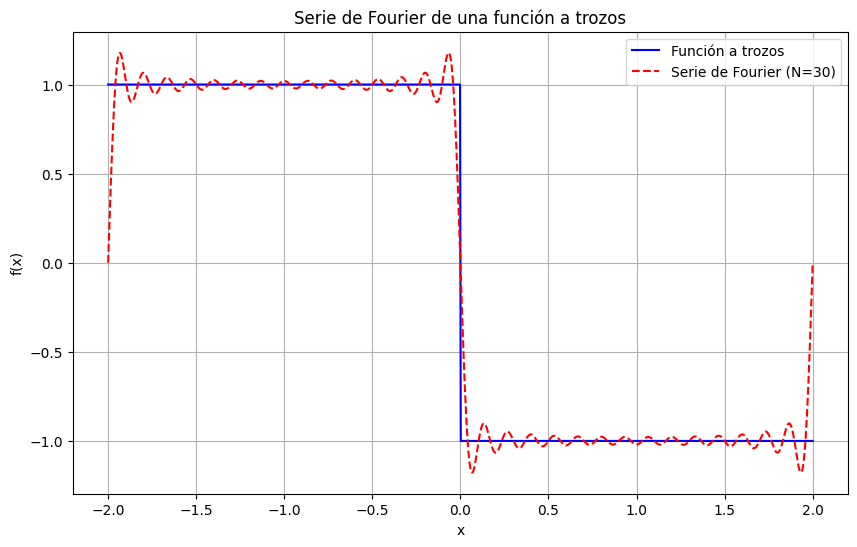

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función a trozos
def funcion_a_trozos(x):
    if x < -np.pi:
        return 0
    elif -np.pi <= x < 0:
        return 1
    elif 0 <= x < np.pi:
        return -1
    else:
        return 0

# Función para calcular los coeficientes de Fourier
def calcular_coeficientes(L, N, funcion):
    a0 = (1 / L) * np.trapz([funcion(x) for x in np.linspace(-L, L, 1000)], dx=2*L/1000)
    an = lambda n: (1 / L) * np.trapz([funcion(x) * np.cos(n * np.pi * x / L) for x in np.linspace(-L, L, 1000)], dx=2*L/1000)
    bn = lambda n: (1 / L) * np.trapz([funcion(x) * np.sin(n * np.pi * x / L) for x in np.linspace(-L, L, 1000)], dx=2*L/1000)

    return a0, an, bn

# Función para aproximar la serie de Fourier
def serie_fourier(x, L, N, a0, an, bn):
    result = a0 / 2
    for n in range(1, N+1):
        result += an(n) * np.cos(n * np.pi * x / L) + bn(n) * np.sin(n * np.pi * x / L)
    return result

# Entrada del usuario
L = float(input("Introduce el intervalo L: "))
N = int(input("Introduce el número de armónicos N: "))
funcion_str = input("Introduce la función a trozos (por ejemplo, 'x < -np.pi: 0, -np.pi <= x < 0: 1, 0 <= x < np.pi: -1'): ")

# Definir la función a trozos según la entrada del usuario
def funcion(x):
    if x < -np.pi:
        return 0
    elif -np.pi <= x < 0:
        return 1
    elif 0 <= x < np.pi:
        return -1
    else:
        return 0

# Calcular los coeficientes de Fourier
a0, an, bn = calcular_coeficientes(L, N, funcion)

# Graficar la función original y su serie de Fourier
x_vals = np.linspace(-L, L, 1000)
y_vals_funcion = [funcion(x) for x in x_vals]
y_vals_fourier = [serie_fourier(x, L, N, a0, an, bn) for x in x_vals]

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals_funcion, label="Función a trozos", color="blue")
plt.plot(x_vals, y_vals_fourier, label=f"Serie de Fourier (N={N})", color="red", linestyle="--")
plt.title("Serie de Fourier de una función a trozos")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()